In [ ]:
import os
import cv2
import numpy as np
from PIL import Image

def extract_seal(input_dir, output_dir, blue_thresh, red_thresh, green_thresh):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate through all files in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.jpg', '.jpeg')):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '.png')
            
            # Read the image
            img_rgb = np.array(Image.open(input_path))
            img = img_rgb
            if img_rgb is None:
                print(f"Failed to load image: {filename}")
                continue
            
            # Split channels
            red = img_rgb[:, :, 0]
            green = img_rgb[:, :, 1]
            blue = img_rgb[:, :, 2]
            
            # Create a mask based on the specified thresholds
            mask = (blue > blue_thresh) & (red < red_thresh)  # & (green < green_thresh)
            
            # Create a transparent image (4 channels: RGBA)
            transparent = np.zeros((img.shape[0], img.shape[1], 4), dtype=np.uint8)
            
            # Copy RGB pixels where the mask is True
            transparent[:, :, :3][mask] = img_rgb[mask]
            
            # Set alpha channel (255 where mask is True, 0 otherwise)
            transparent[:, :, 3][mask] = 255
            
            # Save as PNG with transparency
            Image.fromarray(transparent).save(output_path)
            print(f"Processed: {filename} -> {os.path.basename(output_path)}")

source = "test_data"
target = "test_predictions"
extract_seal(source, target, 100, 150, 200)

: 

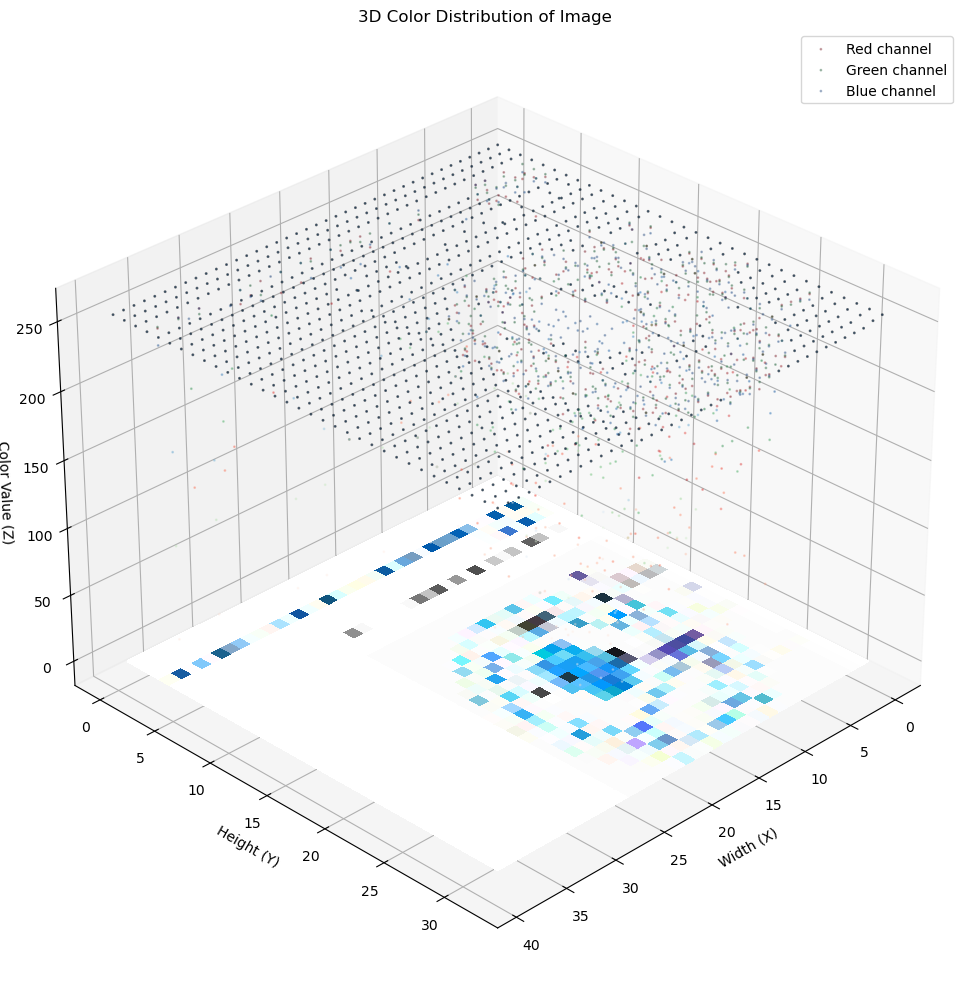

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

def plot_image_colors_3d(image_path, downsample_factor=10):
    """ Creates a 3D plot of image colors with the image itself on the X and Y axes
        image_path (str): Path to the image
        downsample_factor (int): Factor to reduce pixel sampling (for speed)
    """
    # Load image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Downsample the image for faster visualization
    img_array = img_array[::downsample_factor, ::downsample_factor]

    # Get dimensions
    height, width, _ = img_array.shape

    # Create coordinate grid
    x = np.arange(width)
    y = np.arange(height)
    x, y = np.meshgrid(x, y)

    # Normalize RGB colors to 0-1
    colors = img_array / 255.0

    # Create 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Show image colors on XY plane
    ax.plot_surface(x, y, np.zeros_like(x), rstride=1, cstride=1,
                    facecolors=colors, antialiased=False, shade=False)

    # Show color channel values in 3D space
    cmaps = ['Reds', 'Greens', 'Blues']
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel_values = img_array[:, :, i].flatten()
        ax.scatter(x.flatten(), y.flatten(), channel_values,
                   c=channel_values, cmap=cmaps[i],
                   s=1, alpha=0.3, label=f'{color} channel')

    ax.set_xlabel('Width (X)')
    ax.set_ylabel('Height (Y)')
    ax.set_zlabel('Color Value (Z)')
    ax.set_title('3D Color Distribution of Image')
    ax.legend()

    # Set view angle
    ax.view_init(elev=30, azim=45)
    plt.tight_layout()
    plt.show()

# Example usage
plot_image_colors_3d("test_data/БИЗНЕС-ФАБРИКА СРОЧНО!.jpg", downsample_factor=20)

In [2]:
import os
import cv2
import numpy as np
from PIL import Image

def extract_seal(input_dir, output_dir, blue_thresh, red_thresh, green_thresh, filter_size=3):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through all files in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '.png')

            # Read the image
            try:
                img_rgb = np.array(Image.open(input_path))

                # Apply median filter to reduce noise (optional, currently disabled)
                img_filtered = cv2.medianBlur(img_rgb, filter_size)
                img_filtered = cv2.medianBlur(img_filtered, filter_size)
                img_filtered = cv2.medianBlur(img_filtered, filter_size)

                # Split channels
                red = img_filtered[:, :, 0]
                green = img_filtered[:, :, 1]
                blue = img_filtered[:, :, 2]

                # Create a mask based on the specified thresholds
                mask = (blue > blue_thresh) & (red < red_thresh)  # & (green < green_thresh)

                # Create a transparent image (4 channels: RGBA)
                transparent = np.zeros((img_filtered.shape[0], img_filtered.shape[1], 4), dtype=np.uint8)

                # Copy RGB pixels where the mask is True
                transparent[:, :, :3][mask] = img_filtered[mask]

                # Set alpha channel (255 where mask is True, 0 otherwise)
                transparent[:, :, 3][mask] = 255

                # Save as PNG with transparency
                Image.fromarray(transparent).save(output_path)
                print(f"Processed: {filename} -> {os.path.basename(output_path)}")

            except Exception as e:
                print(f"Error processing file {filename}: {str(e)}")
                continue

# Example usage
source = "test_data"
target = "test_predictions/v1.3"
extract_seal(source, target, 200, 150, 200, 5)

Processed: Автолайн  ОГРН_ 1177847405130, , ИНН_ 7814715762.jpg -> Автолайн  ОГРН_ 1177847405130, , ИНН_ 7814715762.png
Processed: СПЕЦСТРОЙТРАНС_ ООО ИНН_ 3245012626  ОГРН_ 117325.jpg -> СПЕЦСТРОЙТРАНС_ ООО ИНН_ 3245012626  ОГРН_ 117325.png
Processed: Кондратьева.jpg -> Кондратьева.png
Processed: Таблоджикс Форвардинг.jpg -> Таблоджикс Форвардинг.png
Processed: Адамант.jpg -> Адамант.png
Processed: ТТС РОКАДА  ИНН_ 7701951751 ОГРН_ 1127746216.jpg -> ТТС РОКАДА  ИНН_ 7701951751 ОГРН_ 1127746216.png
Processed: АВТОЛЮКС.jpg -> АВТОЛЮКС.png
Processed: АльфаТрак.jpg -> АльфаТрак.png
Processed: ВАДА.jpg -> ВАДА.png
Processed: ФИНРЕГИО.jpg -> ФИНРЕГИО.png
Processed: БГА_.jpg -> БГА_.png
Processed: ВОДОКАНАЛ_ ГО.jpg -> ВОДОКАНАЛ_ ГО.png
Processed: Закваскин.jpg -> Закваскин.png
Processed: Интеркара.jpg -> Интеркара.png
Processed: ПЯТЫЙ ЭЛЕМЕНТ_.jpg -> ПЯТЫЙ ЭЛЕМЕНТ_.png
Processed: ТЕКСТИЛЬ.jpg -> ТЕКСТИЛЬ.png
Processed: АВТОДОР-ПЛАТНЫЕ ДОРОГИ_ ИНН 7710965662 ОГРН 1.jpg -> АВТОДОР-ПЛАТНЫ

In [3]:
image = Image.open("5294463897711013670.jpg")

In [4]:
np.array(image)

array([[[146, 211, 231],
        [141, 206, 228],
        [134, 199, 221],
        [128, 194, 218],
        [124, 190, 216],
        [120, 187, 216],
        [116, 182, 214],
        [111, 180, 213],
        [109, 177, 212],
        [106, 174, 211],
        [103, 171, 210],
        [ 99, 168, 209],
        [ 98, 167, 208],
        [ 98, 165, 208],
        [ 98, 165, 208]],

       [[143, 208, 228],
        [138, 203, 225],
        [132, 197, 219],
        [126, 192, 216],
        [123, 189, 215],
        [119, 186, 215],
        [116, 182, 214],
        [111, 180, 213],
        [108, 176, 211],
        [106, 174, 211],
        [102, 171, 210],
        [ 99, 168, 209],
        [ 98, 167, 208],
        [ 98, 167, 209],
        [ 98, 167, 209]],

       [[139, 204, 224],
        [134, 199, 221],
        [127, 193, 215],
        [123, 189, 213],
        [119, 186, 212],
        [117, 184, 213],
        [112, 181, 212],
        [110, 179, 212],
        [108, 176, 211],
        [105, 175, 21

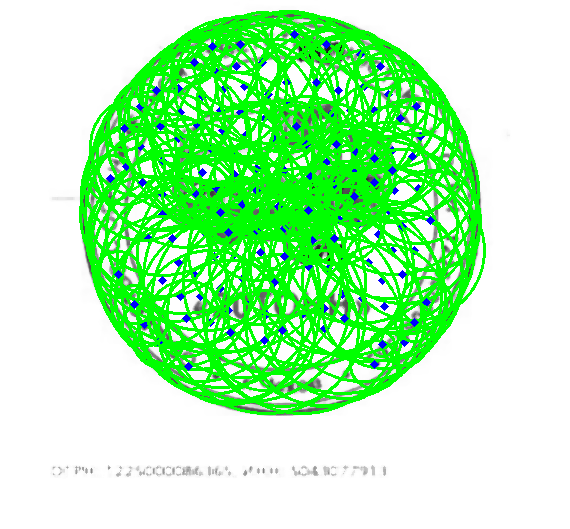

In [5]:
import cv2
import numpy as np
from PIL import Image

# Load the image in grayscale
img = cv2.imread(r"20.jpg", 0)

# Apply median blur to reduce noise
img = cv2.medianBlur(img, 5)

# Convert grayscale image to BGR for drawing colored circles
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Detect circles using the Hough Transform
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=10, maxRadius=100)

# If circles are detected
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

# Convert the image to PIL format for display or saving
Image.fromarray(cimg)

In [6]:
import os
import torch
print(torch.cuda.is_available())
import numpy as np
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import cv2
import albumentations as A
import segmentation_models_pytorch as smp

print("doing_class")

class StampDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Path to the folder (train/valid/test)
            transform (callable, optional): Augmentations
        """
        self.root_dir = root_dir
        self.transform = transform
        
        # Collect image-mask pairs
        self.samples = []
        for f in os.listdir(root_dir):
            if f.endswith('.jpg'):
                base_name = os.path.splitext(f)[0]
                mask_name = base_name + '_mask.png'
                if os.path.exists(os.path.join(root_dir, mask_name)):
                    self.samples.append((f, mask_name))
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_name, mask_name = self.samples[idx]
        
        # Load image (RGB)
        img_path = os.path.join(self.root_dir, img_name)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Load mask (Grayscale)
        mask_path = os.path.join(self.root_dir, mask_name)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Normalize and binarize mask
        image = image.astype(np.float32) / 255.0
        mask = (mask > 0).astype(np.float32)  # Binarization: 0/1
        
        # Apply augmentations
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
        
        # Convert to tensors with proper shape
        image = torch.from_numpy(image).permute(2, 0, 1)  # [C, H, W]
        mask = torch.from_numpy(mask).long()              # [H, W]
        
        return image, mask

print("doing_datasets")

# Augmentations
train_transform = A.Compose([
    A.Resize(256, 256),  # Fixed size
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=30, p=0.5)
])

val_transform = A.Compose([
    A.Resize(256, 256)  # Same size for validation
])

# Datasets
train_dataset = StampDataset(
    root_dir='semantic.v4i.png-mask-semantic/train',
    transform=train_transform
)

val_dataset = StampDataset(
    root_dir='semantic.v4i.png-mask-semantic/valid',
    transform=val_transform  # No augmentation
)

print("doing_loaders")

# DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    #num_workers=4,
    #pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    #num_workers=4
)

print("importing_model")

# Model
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    classes=1,
    activation='sigmoid'
).to('cuda')

# Optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = smp.losses.DiceLoss(mode='binary')

print("imported_model")

# Test loading
images, masks = next(iter(train_loader))
print(f"Images shape: {images.shape}")  # [batch_size, 3, H, W]
print(f"Masks shape: {masks.shape}")    # [batch_size, H, W]


False
doing_class
doing_datasets
doing_loaders
importing_model


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
for epoch in range(10):
    model.train()
    for images, masks in train_loader:
        images = images.to("cuda")
        masks = masks.to("cuda")
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init

device = "cuda"

class CustomStampDetector(nn.Module):
    def __init__(self):
        super().__init__()

        # First convolutional layer with custom initialization
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding='same')

        # Second and third layers
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding='same')
        self.conv3 = nn.Conv2d(32, 1, kernel_size=3, padding='same')

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        # Custom initialization
        self._initialize_weights()

    def _initialize_weights(self):
        # Initialize the first layer
        with torch.no_grad():
            # Red channel
            self.conv1.weight.data[0, 0] = -1.0  # R
            self.conv1.weight.data[0, 1] =  0.0  # G
            self.conv1.weight.data[0, 2] =  1.0  # B

            # Random initialization for the rest of the filters
            init.kaiming_normal_(self.conv1.weight.data[1:], mode='fan_out', nonlinearity='relu')
            init.zeros_(self.conv1.bias.data)

        # Standard initialization for other layers
        init.kaiming_normal_(self.conv2.weight, mode='fan_out', nonlinearity='relu')
        init.zeros_(self.conv2.bias)
        init.kaiming_normal_(self.conv3.weight, mode='fan_out', nonlinearity='relu')
        init.zeros_(self.conv3.bias)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.sigmoid(self.conv3(x))  # Output in [0, 1]
        return x

# Initialize model
model_custom = CustomStampDetector().to(device)
print(model_custom)

# Test the model
test_input = torch.randn(1, 3, 256, 256).to(device)
output = model_custom(test_input)
print(f"Input shape: {test_input.shape}")
print(f"Output shape: {output.shape}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("B channel weights")
plt.imshow(model_custom.conv1.weight[0, 2].cpu().detach())
plt.subplot(1, 3, 2)
plt.title("R channel weights")
plt.imshow(model_custom.conv1.weight[0, 0].cpu().detach())
plt.subplot(1, 3, 3)
plt.title("G channel weights")
plt.imshow(model_custom.conv1.weight[0, 1].cpu().detach())
plt.show()

In [ ]:
train_loader = DataLoader(
    train_dataset,
    batch_size=256,
    shuffle=True,
    #num_workers=4,
    #pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    #num_workers=4
)

In [ ]:
from tqdm import tqdm
criterion = nn.BCELoss()  # Binary Cross-Entropy
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(10):
    model_custom.train()
    for images, masks in tqdm(train_loader):
        images = images.to(device)
        masks = masks.float().to(device)
        
        optimizer.zero_grad()
        outputs = model_custom(images)
        loss = criterion(outputs.squeeze(1), masks)
        loss.backward()
        optimizer.step()
    print(loss)

In [ ]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
torch.save(model_custom.state_dict(), "model_custom.pth")

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import os
import segmentation_models_pytorch as smp

model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    classes=1,
    activation='sigmoid'
).to('cuda')

checkpoint = torch.load("model.pth")
model.load_state_dict(checkpoint)

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

def test_and_visualize(model, test_images_paths, device, resize_to=(256, 256)):
    """
    Tests the model on several images and visualizes the results.

    Args:
        model: Trained model
        test_images_paths: List of paths to test images
        device: 'cpu' or 'cuda'
        resize_to: Size to resize the images to
    """
    # Prepare transformations
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(resize_to),
        transforms.ToTensor()
    ])
    
    model.eval()
    
    for img_path in test_images_paths:
        # Load and preprocess the image
        img = np.array(Image.open(img_path))
        img_tensor = transform(img).unsqueeze(0).to(device)
        
        # Make prediction
        with torch.no_grad():
            pred = model(img_tensor)
            pred_mask = (pred.squeeze().cpu().numpy() > 0.5).astype(np.uint8)
        
        # Visualization
        plt.figure(figsize=(15, 5))
        
        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title('Original Image')
        plt.axis('off')
        
        # Predicted mask
        plt.subplot(1, 2, 2)
        plt.imshow(pred_mask, cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# Directory with test images
dirr = "test_data"
test_images = [os.path.join(dirr, photo) for photo in os.listdir(dirr)]

# Run testing and visualization
test_and_visualize(model, test_images, "cuda")


In [ ]:
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    classes=1,
    activation='sigmoid'
)#.to('cuda')

checkpoint = torch.load("model.pth", map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)
model.eval()

dirr = "test_data"
target = "test_predictions/v2.6"

os.makedirs(target, exist_ok = True)
for image_path in os.listdir(dirr):
    img_path = os.path.join(dirr, image_path)
    img = np.array(Image.open(img_path))
    result = process_image_with_model(model, img, blue_thresh=50, red_thresh=200, device='cpu')
    Image.fromarray(result).save(os.path.join(target, image_path) + ".png")
    print(f"Processed {image_path}")